# Assignment #1 - "AND" logic

In [ ]:
import numpy as np

In [ ]:
class Perceptron:
  def __init__(self,N,alpha=0.1):
    self.W=np.random.randn(N+1)/np.sqrt(N)
    self.alpha=alpha

  def step(self,x):
    return 1 if x>0 else 0

  def fit(self,X,y,epochs=10):
    X=np.c_[np.ones((X.shape[0])),X]

    for epoch in np.arange(0,epochs):
      for (x,target) in zip(X,y):
        p=self.step(np.dot(x,self.W))
        if p != target:
          error=p-target
          self.W+=-self.alpha*error*x
  def predict(self,X,add_bias=True):
    X=np.atleast_2d(X)
    if add_bias:
      X=np.c_[np.ones((X.shape[0])),X]

    return self.step(np.dot(X,self.W))

In [ ]:
X= np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[0],[0],[1]])

In [ ]:
X.shape

(4, 2)

In [ ]:
model=Perceptron(X.shape[1],alpha=0.1)
model

In [ ]:
model.fit(X,y,epochs=20)

In [ ]:
for (x,target) in zip(X,y):
  predict=model.predict(x)
  print(f'X={x} , label={target[0]}, prediction={predict}')

X=[0 0] , label=0, prediction=0
X=[0 1] , label=0, prediction=0
X=[1 0] , label=0, prediction=0
X=[1 1] , label=1, prediction=1


In [ ]:
model.W
w0,w1,w2=model.W
x2_hat=-1*(X[:,0]*w1+w0)/w2

In [ ]:
y

array([[0],
       [0],
       [0],
       [1]])

In [ ]:
y.flatten()

array([0, 0, 0, 1])

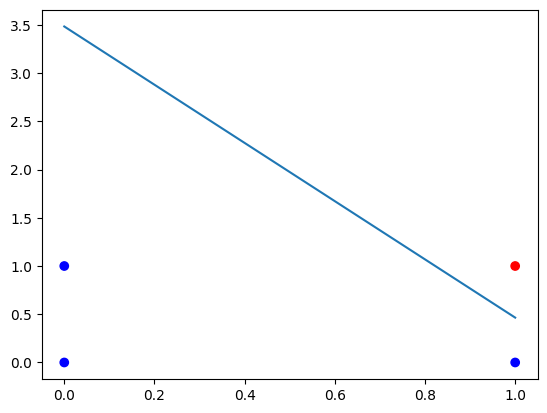

In [ ]:
import matplotlib.pyplot as plt
colors=['blue','red']
y_colors=[colors[i] for i in y.flatten()]
plt.scatter(X[:,0],X[:,1],color=y_colors)
plt.plot(X[:,0],x2_hat)

Done!

# Assignment #2 - Grid Search on MLPClassifier's Hyperparameters

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
import pandas as pd
import numpy as np

prefix_url='https://graphemy.ir/datasets'
def get_file(name):
  file_name=name if '.csv' in name else f'{name}.csv'
  return f'{prefix_url}/{file_name}'

In [ ]:
df=pd.read_csv(get_file("heart_failure_clinical_records_dataset"))
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df['DEATH_EVENT'].value_counts()

,count
DEATH_EVENT,
0,203
1,96


In [ ]:
X=df.drop('DEATH_EVENT',axis=1).to_numpy()
y=df['DEATH_EVENT'].to_numpy()

X.shape,y.shape

((299, 12), (299,))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

seed=1404
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=seed)

scaler=MinMaxScaler()

# Pipeline for MLPClassifier
pipe = Pipeline([
    ('scaler', scaler),
    ('cls', MLPClassifier())
])

params = {
    "cls__hidden_layer_sizes": [100, 150, 200],
    "cls__max_iter": [1000],
    "cls__solver": ['adam', 'lbfgs'],
    "cls__learning_rate_init": [0.001, 0.01],
    "cls__random_state": [seed]
}

model = GridSearchCV(pipe, param_grid=params, cv=5, scoring="f1")
model.fit(X_train, y_train)

prediction=model.predict(X_test)
print(classification_report(y_test,prediction))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        39
           1       0.63      0.57      0.60        21

    accuracy                           0.73        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.73      0.73      0.73        60



In [ ]:
print(model.best_params_)

{'cls__hidden_layer_sizes': 200, 'cls__learning_rate_init': 0.01, 'cls__max_iter': 1000, 'cls__random_state': 1404, 'cls__solver': 'adam'}


Done!

# Assignment #3 - Grid Search on Logestic Regression (LR) and Decision Tree (DT) Algorithms' Hyperparameters

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np

prefix_url='https://graphemy.ir/datasets'
def get_file(name):
  file_name=name if '.csv' in name else f'{name}.csv'
  return f'{prefix_url}/{file_name}'
df=pd.read_csv(get_file("heart_failure_clinical_records_dataset"))

X=df.drop('DEATH_EVENT',axis=1).to_numpy()
y=df['DEATH_EVENT'].to_numpy()



seed=1404
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=seed)

scaler=MinMaxScaler()

# Pipeline for LogisticRegression
pipe1 = Pipeline([
    ('scaler', scaler),
    ('cls', LogisticRegression())
])

params1 = {
    "cls__solver": ["lbfgs", "liblinear", "newton-cg"],
    "cls__max_iter": [200, 300],
    "cls__tol": [0.001, 0.009]
}

# Pipeline for DecisionTreeClassifier
pipe2 = Pipeline([
    ('scaler', scaler),
    ('cls', DecisionTreeClassifier())
])

params2 = {
    "cls__criterion": ["gini"],
    "cls__max_depth": [5, 7],
    "cls__min_samples_split": [2,3]
}


model1 = GridSearchCV(pipe1, param_grid=params1, cv=5, scoring="f1")
model2 = GridSearchCV(pipe2, param_grid=params2, cv=5, scoring="f1")

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

print("classification_report for LogisticRegression with best hyperparameters:")
prediction1=model1.predict(X_test)
print(classification_report(y_test,prediction1))

print("classification_report for DecisionTreeClassifier with best hyperparameters:")
prediction2=model2.predict(X_test)
print(classification_report(y_test,prediction2))

classification_report for LogisticRegression with best hyperparameters:
              precision    recall  f1-score   support

           0       0.77      0.85      0.80        39
           1       0.65      0.52      0.58        21

    accuracy                           0.73        60
   macro avg       0.71      0.68      0.69        60
weighted avg       0.73      0.73      0.73        60

classification_report for DecisionTreeClassifier with best hyperparameters:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        39
           1       0.63      0.57      0.60        21

    accuracy                           0.73        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.73      0.73      0.73        60



In [ ]:
print("The best hyperparameters for the LogisticRegression algorithm:")
print(model1.best_params_)

The best hyperparameters for the LogisticRegression algorithm:
{'cls__max_iter': 200, 'cls__solver': 'lbfgs', 'cls__tol': 0.001}


In [ ]:
print("The best hyperparameters for the DecisionTreeClassifier algorithm:")
print(model2.best_params_)

The best hyperparameters for the DecisionTreeClassifier algorithm:
{'cls__criterion': 'gini', 'cls__max_depth': 5, 'cls__min_samples_split': 2}


DecisionTreeClassifier is faster than MLPClassifier for this problem and resulted in equivalent outcome.
 Done!